<hr/>

# Data Mining  [EN.553.636.02]

04/27/2018

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 9:00am ~ 11:00am

- **Data Aggregation and Group Operations**: GroupBy, Apply, Pivot Tables and Cross-Tabulation
- **Data Analysis Example**: US Baby Names 1880–2010
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import re
import seaborn as sns

<h2><font color="darkblue">Data Aggregation and Group Operations</font></h2>
<hr/>

### GroupBy

- **Illustration of a group aggregation**

<img src='files/10-1.png' width=1000 align=center>

In [3]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.021066,-0.207310,a,one
1,0.274236,0.972449,a,two
2,1.268507,1.581554,b,one
3,-0.540077,0.239506,b,two
4,1.655032,0.691188,a,one


In [4]:
# Compute the mean of the 'data1' column using the labels from 'key1'
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.983445
b    0.364215
Name: data1, dtype: float64

In [5]:
# Multiple keys
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     1.338049
      two     0.274236
b     one     1.268507
      two    -0.540077
Name: data1, dtype: float64

In [6]:
# By default, all of the numeric columns are aggregated
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.983445,0.485443
b,0.364215,0.910530


In [7]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   1.338049  0.241939
     two   0.274236  0.972449
b    one   1.268507  1.581554
     two  -0.540077  0.239506

In [8]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

<font color='red'>**Note**: Any missing values in a group key will be excluded from the result</font> 

- **Selecting a Column or Subset of Columns**

In [10]:
# Aggregate only a few column
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.241939
     two   0.972449
b    one   1.581554
     two   0.239506

In [11]:
# Alternatively
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one     0.241939
      two     0.972449
b     one     1.581554
      two     0.239506
Name: data2, dtype: float64

- **Grouping with Dicts and Series**

In [12]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan
people

,a,b,c,d,e
Joe,-0.292163,-0.785553,-0.537563,-1.870188,0.757067
Steve,0.331551,-0.690986,1.445161,2.197396,-1.389839
Wes,0.638839,NaN,NaN,0.933698,-0.084772
Jim,-1.101842,-0.000106,0.118568,-0.109992,0.467372
Travis,0.943128,-1.800634,2.336836,-0.619022,-0.052088


In [14]:
# Group correspondence for the columns
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}

In [15]:
# Group by column with mapping
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-2.407752,-0.320649
Steve,3.642557,-1.749273
Wes,0.933698,0.554068
Jim,0.008576,-0.634576
Travis,1.717814,-0.909593


In [16]:
# Same for Series
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [17]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


- **Grouping with Functions**

In [19]:
people

,a,b,c,d,e
Joe,-0.292163,-0.785553,-0.537563,-1.870188,0.757067
Steve,0.331551,-0.690986,1.445161,2.197396,-1.389839
Wes,0.638839,NaN,NaN,0.933698,-0.084772
Jim,-1.101842,-0.000106,0.118568,-0.109992,0.467372
Travis,0.943128,-1.800634,2.336836,-0.619022,-0.052088


In [18]:
# Group by the length of the names
people.groupby(len).sum()

,a,b,c,d,e
3,-0.755166,-0.785658,-0.418996,-1.046482,1.139667
5,0.331551,-0.690986,1.445161,2.197396,-1.389839
6,0.943128,-1.800634,2.336836,-0.619022,-0.052088


In [20]:
# Mixing functions with arrays, dicts, or Series
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.292163 -0.785553 -0.537563 -1.870188 -0.084772
  two -1.101842 -0.000106  0.118568 -0.109992  0.467372
5 one  0.331551 -0.690986  1.445161  2.197396 -1.389839
6 two  0.943128 -1.800634  2.336836 -0.619022 -0.052088

### Data Aggregation

- **Optimized Groupby Methods**

<img src='files/10-11.png' width=1000 align=center>

In [21]:
df

,data1,data2,key1,key2
0,1.021066,-0.207310,a,one
1,0.274236,0.972449,a,two
2,1.268507,1.581554,b,one
3,-0.540077,0.239506,b,two
4,1.655032,0.691188,a,one


In [22]:
# User defined aggregation functions
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [24]:
grouped = df.groupby('key1')
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.380796,1.179759
b,1.808584,1.342047


In [25]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.983445  0.691167  0.274236  0.647651  1.021066  1.338049   
b      2.0  0.364215  1.278862 -0.540077 -0.087931  0.364215  0.816361   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.655032   3.0  0.485443  0.616203 -0.207310  0.241939  0.691188   
b     1.268507   2.0  0.910530  0.948971  0.239506  0.575018  0.910530   

                          
           75%       max  
key1                      
a     0.831819  0.972449  
b     1.246042  1.581554

- **Column-Wise and Multiple Function Application**

In [28]:
tips = pd.read_csv('files/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [29]:
grouped = tips.groupby(['day', 'smoker'])

In [30]:
# Pass the name of the function as a string
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [31]:
# A list of functions or function names
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [32]:
# The first element of each tuple will be used as the DataFrame column names
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [33]:
# A list of functions applying to all of the columns
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [34]:
# Different functions per column
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [35]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### General split-apply-combine

- **Filling Missing Values with Group-Specific Values**

In [36]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.543079
2         NaN
3   -0.253921
4         NaN
5   -0.386683
dtype: float64

In [37]:
# Fill missing values with mean
s.fillna(s.mean())

0   -0.394561
1   -0.543079
2   -0.394561
3   -0.253921
4   -0.394561
5   -0.386683
dtype: float64

In [39]:
states = ['Ohio', 'New York', 'Vermont', 'Florida', 'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -1.402922
New York      0.842556
Vermont            NaN
Florida       0.529779
Oregon        0.271826
Nevada             NaN
California   -2.212298
Idaho              NaN
dtype: float64

In [40]:
data.groupby(group_key).mean()

East   -0.010196
West   -0.970236
dtype: float64

In [41]:
# Fill missing value according to group
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -1.402922
New York      0.842556
Vermont      -0.010196
Florida       0.529779
Oregon        0.271826
Nevada       -0.970236
California   -2.212298
Idaho        -0.970236
dtype: float64

- **Group Weighted Average and Correlation**

In [43]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'], 'data': np.random.randn(8), 'weights': np.random.rand(8)})
df

,category,data,weights
0,a,1.196036,0.949882
1,a,2.053423,0.683032
2,a,1.295492,0.841091
3,a,0.610028,0.178628
4,b,-1.181663,0.690371
5,b,0.335817,0.701062
6,b,0.384088,0.974863
7,b,0.103514,0.629646


In [44]:
# Group weighted average
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    1.408880
b   -0.046979
dtype: float64

### Pivot Tables and Cross-Tabulation

In [45]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [46]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [47]:
# Include partial total
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [48]:
# Change aggregation function
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day', aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [49]:
# Fill NaN with 0
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'], columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

- **`pivot_table` Options**

<img src='files/10-2.png' width=1000 align=center>

<h2><font color="darkblue">Data Analysis Example</font></h2>
<hr/>

### US Baby Names 1880–2010

There are many things we could do with the dataset
- Visualize the proportion of babies given a particular name (your own, or another name) over time
- Determine the relative rank of a name
- Determine the most popular names in each year or the names whose popularity has advanced or declined the most
- Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
- Analyze external sources of trends: biblical names, celebrities, demographic changes
- etc

- **Assemble all of the data**

In [51]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'files/babynames/yob%d.txt' % year 
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [52]:
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


<font color='red'>**Note**: `concat` glues the DataFrame objects together row-wise by default</font> 

- **Exploratory Data Analysis**

In [53]:
# Aggregate data at the year and sex level
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


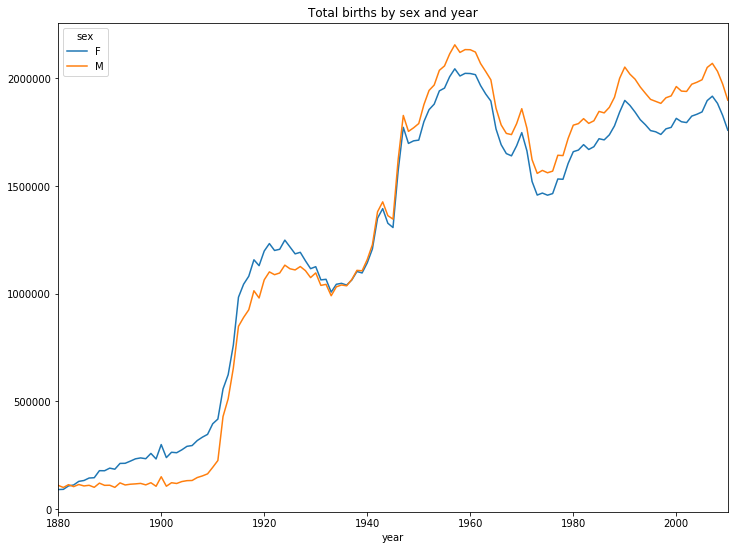

In [56]:
total_births.plot(title='Total births by sex and year', figsize=(12,9));

In [58]:
# Insert a column 'prop' with the fraction of babies given each name relative to the total number of births
def add_prop(group):
    group['prop'] = group.births / group.births.sum() 
    return group

In [60]:
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [66]:
# Check the result
names.groupby(['year', 'sex']).prop.sum().head(10)

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
Name: prop, dtype: float64

In [62]:
# Extract a subset of the data to facilitate further analysis
def get_top1000(group):
    # Top 1000 names for each sex/year combination
    return group.sort_values(by='births', ascending=False)[:1000]

In [64]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed 
top1000.reset_index(inplace=True, drop=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


- **Analyzing Naming Trends**

In [73]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [74]:
# Pivot table of the total number of births by year and name
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

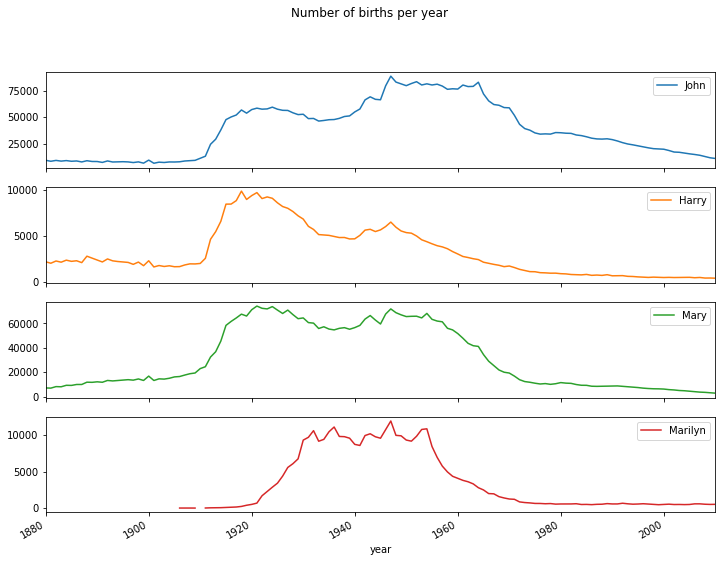

In [77]:
# Visualize a subset
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 9), grid=False, title='Number of births per year');

- **Measuring the increase in naming diversity**

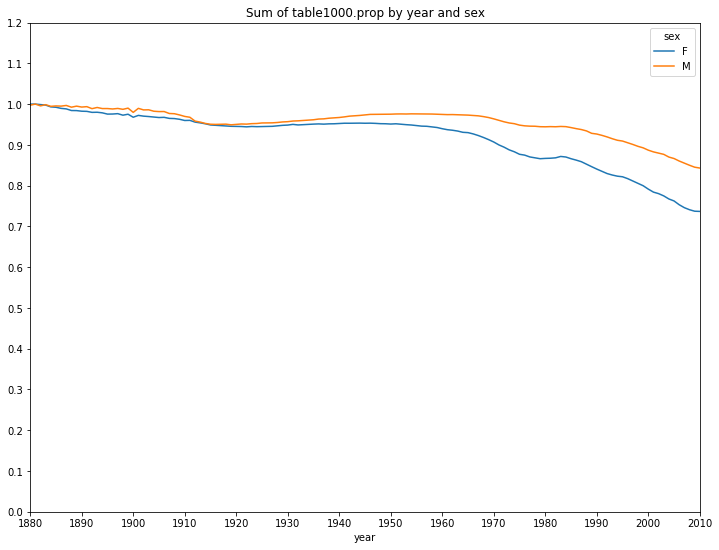

In [78]:
# Pivot table of the prop by year and sex
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(figsize=(12, 9), title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10));

- **The “last letter” revolution**

In [79]:
# Extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter) 
last_letters.name = 'last_letter'

In [80]:
# Aggregate all of the births in the full dataset by year, sex, and final letter
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [81]:
# Print out some years
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [82]:
# Normalize the table by total births
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

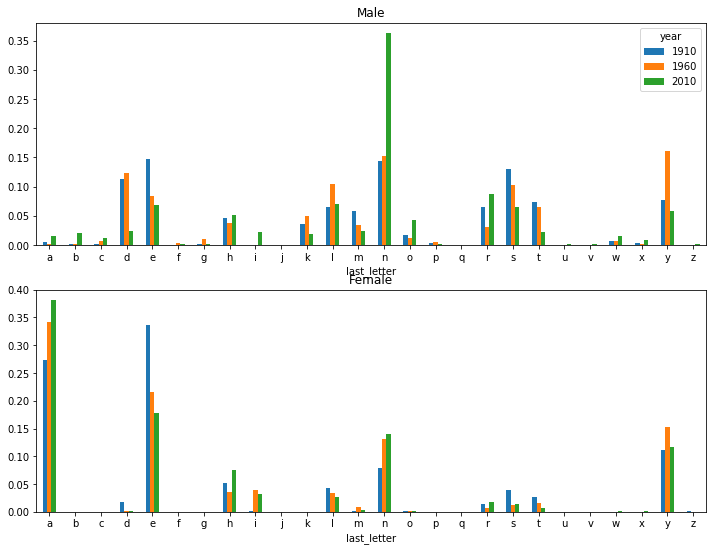

In [84]:
# Visualize the result
fig, axes = plt.subplots(2, 1, figsize=(12, 9))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male');
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False);

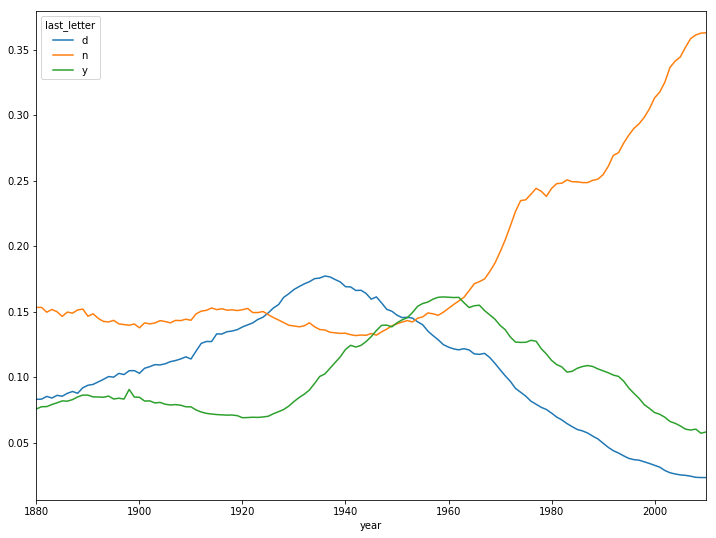

In [86]:
# For full data
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.plot(figsize=(12,9));

- **Boy names that became girl names (and vice versa)**

In [89]:
# A list of names occurring in the dataset starting with “lesl”
all_names = pd.Series(top1000.name.unique());
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [90]:
# Aggregate by sex and year and normalize within year
filtered = top1000[top1000.name.isin(lesley_like)]
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

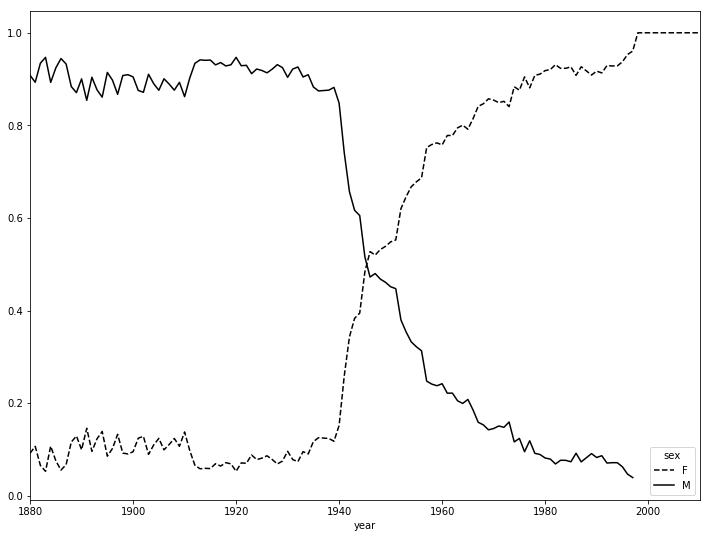

In [92]:
# Visualize the result
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(12,9));

## References

- Wes Mckinney, _Python for Data Analysis_, O'Reilly (2012).
- [scikit-learn](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width=800 align=center>